# Using Existing Splits

Instead of using ```sklearn.model_selection.train_test_split```, use the pre-configured splits.
<img src="image/tfds_dataset_existing_splits.png" align="left"/>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_addons as tfa

# Construct a tf.data.Dataset
mnist, info = tfds.load(
    'mnist',              # Name of the dataset
    with_info=True,       # Information of the dataset
    shuffle_files=True, 
)

2021-07-16 11:09:22.072892: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Dataset Information

In [2]:
info

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

# Loading a specific split

Dataset in the format (data, label) ready for training ```monitor.fit()```.

In [3]:
mnist_test_data = tfds.load('mnist', split=tfds.Split.TEST)
mnist_test_data

<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

(28, 28, 1)


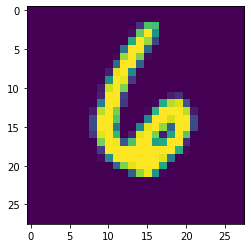

In [6]:
import matplotlib.pyplot as plt
for test_data in mnist_test_data.take(1):
    print(test_data['image'].shape)
    plt.imshow(tf.cast(test_data['image'], dtype=tf.float32))

# Train, Validation Split

In [9]:
(train_data, train_label), (validation_data, validation_label) = tfds.as_numpy(tfds.load(
    'mnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True          # Return a dataset in (data, label) format ready for model.fit()
))

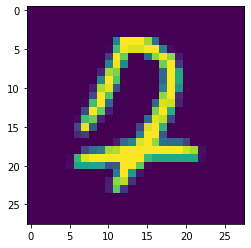

In [10]:
plt.imshow(train_data[0])

In [26]:
trainig_data = tfds.load('mnist', split='train', as_supervised=True).shuffle(100).batch(32)
validation_data = tfds.load('mnist', split='test', as_supervised=True).shuffle(100).batch(32)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    # 10 classes (digit 0-9)
])

model.compile(
    optimizer='Adam', 
    oss='sparse_categorical_crossentropy',  # Multi categorical index to digit 0 to 9
    metrics=['accuracy']
)

In [27]:
history = model.fit(trainig_data, epochs=10, validation_data=validation_data)

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.4677 - accuracy: 0.9475 - val_loss: 0.1765 - val_accuracy: 0.9547
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0647 - accuracy: 0.9808 - val_loss: 0.1037 - val_accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0504 - accuracy: 0.9847 - val_loss: 0.0986 - val_accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0448 - accuracy: 0.9872 - val_loss: 0.1505 - val_accuracy: 0.9699
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0385 - accuracy: 0.9891 - val_loss: 0.1253 - val_accuracy: 0.9748
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0300 - accuracy: 0.9922 - val_loss: 0.1349 - val_accuracy: 0.9762
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0264 - accuracy: 0.9930 - val_loss: 0.1437 -